# Image compression through Singular Value Decomposition


Load a picture as a 3-dimensional `np.array`

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import rotate

# write here the import path of the image
# test this with
# - TarantulaNebula
# - mondrian
# - mondrian (rotated)
image_path = "./TarantulaNebula.jpg"

A = imread(image_path)
# A = rotate(A, 20, reshape=False)

Visualize the picture


(-0.5, 629.5, 566.5, -0.5)

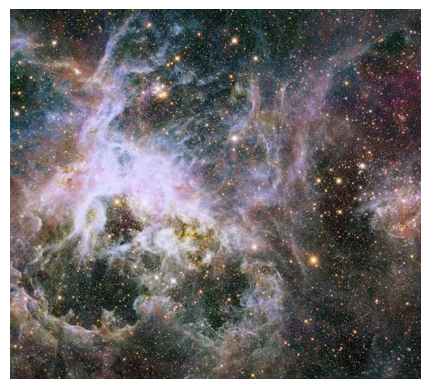

In [2]:
img = plt.imshow(A)
plt.axis("off")

Convert the picture to gray-scale and visualize it.


In [3]:
X = np.mean(A, axis=2)

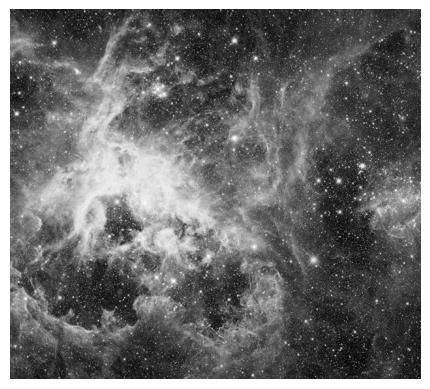

In [4]:
img = plt.imshow(X)
plt.axis("off")
img.set_cmap("gray")
plt.show()

What is the picture size?


In [5]:
X.shape

(567, 630)

Perform the SVD decomposition


In [6]:
# SOLUTION-BEGIN
U, s, VT = np.linalg.svd(X, full_matrices=False)

U.shape, s.shape, VT.shape
# SOLUTION-END

((567, 567), (567,), (567, 630))

Plot the trend of

- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$


Text(0.5, 1.0, 'Explained variance')

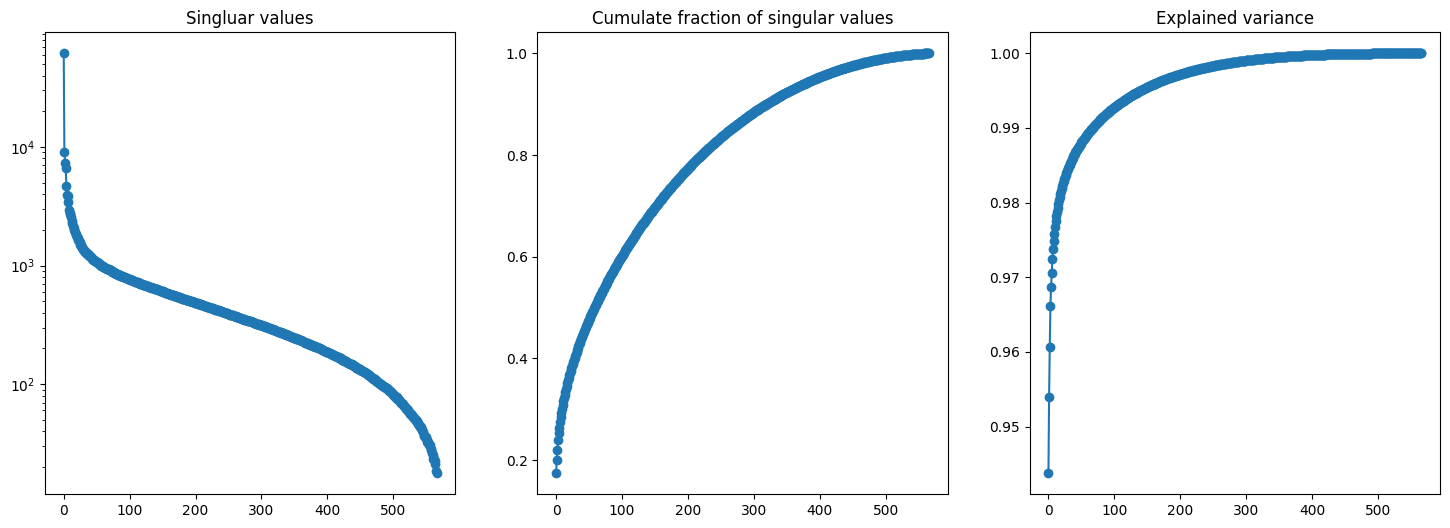

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes[0].semilogy(s, "o-")
axes[0].set_title("Singluar values")

axes[1].plot(np.cumsum(s) / np.sum(s), "o-")
axes[1].set_title("Cumulate fraction of singular values")

axes[2].plot(np.sqrt(np.cumsum(s**2) / np.sum(s**2)), "o-")
axes[2].set_title("Explained variance")

Visualize the best rank-$k$ matrices ($A_k$), for $k$ = 1, 5, 10, 50, 100, 500


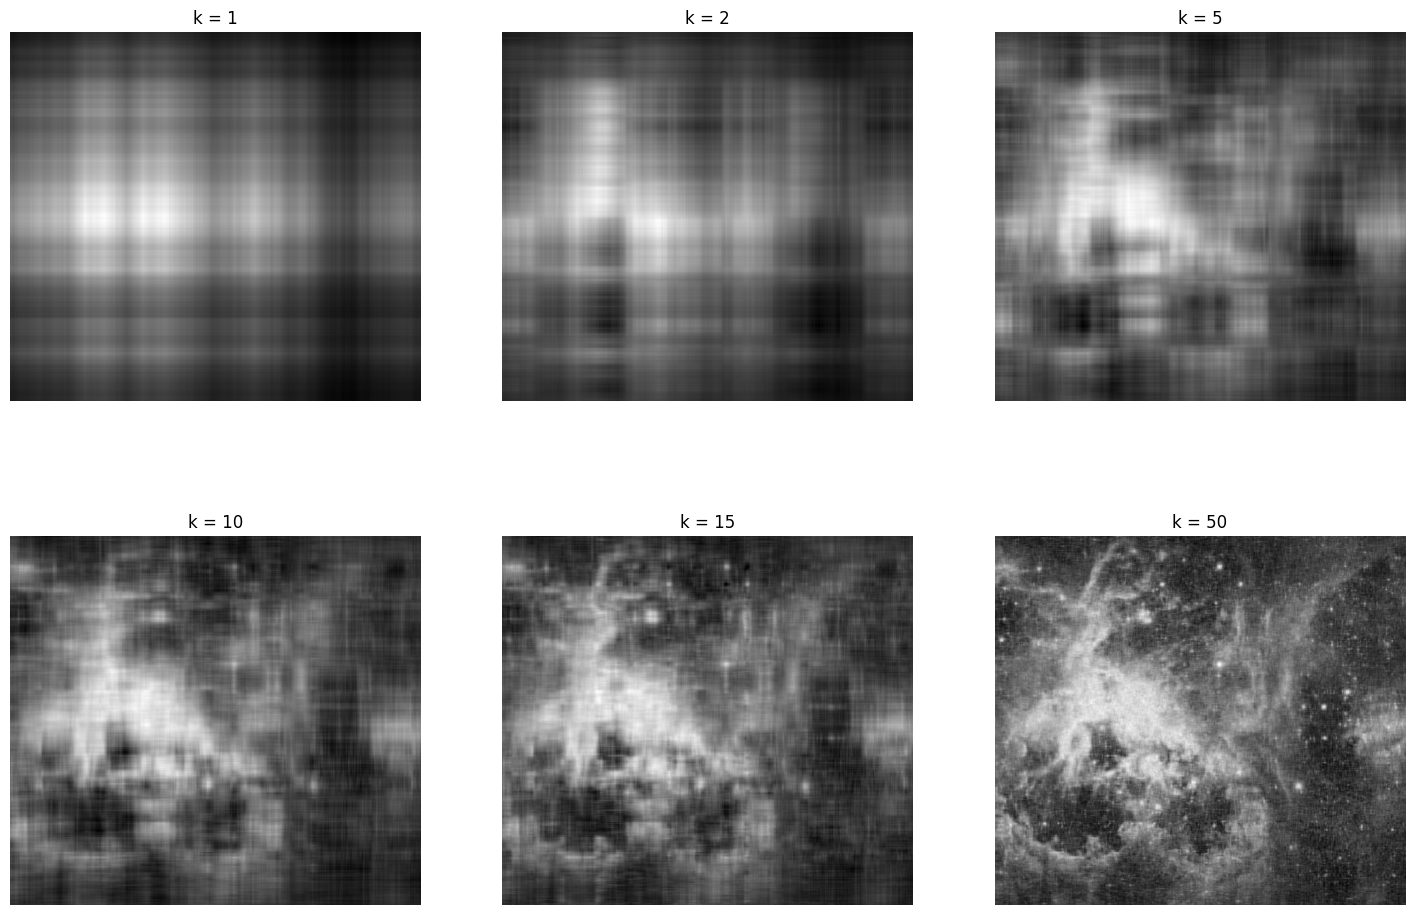

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axs = axs.reshape((-1,))
idxs = [1, 2, 5, 10, 15, 50]
for i in range(len(idxs)):
    k = idxs[i]
    # SOLUTION-BEGIN
    A_k = np.matmul(U[:, :k], np.matmul(np.diag(s[:k]), VT[:k, :]))
    axs[i].imshow(A_k, cmap="gray")
    # SOLUTION-END
    axs[i].set_title(f"k = {k}")
    axs[i].axis("off")

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6. 

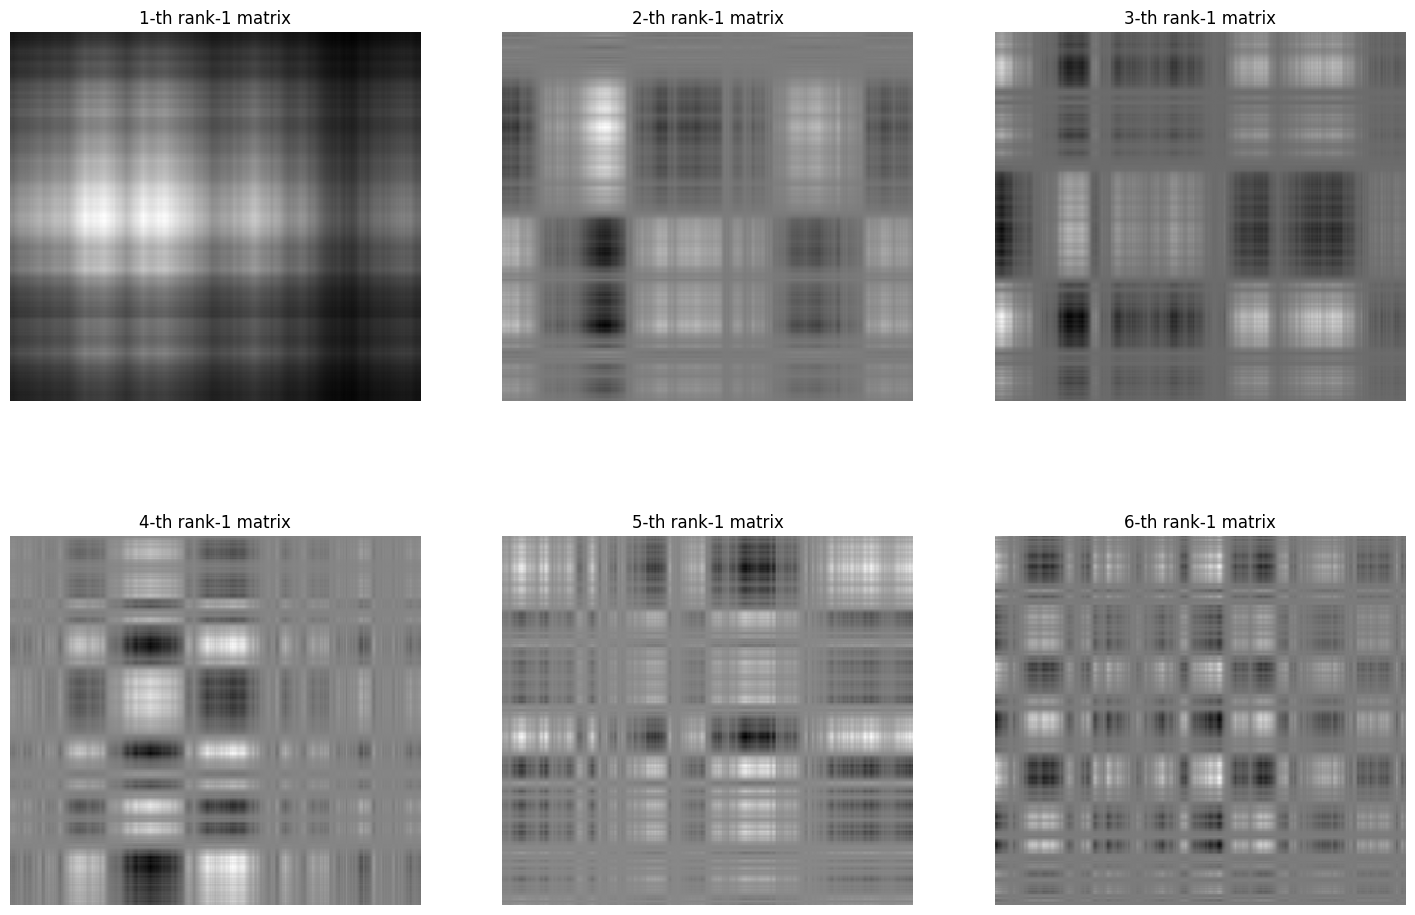

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axs = axs.reshape((-1,))
idxs = [1, 2, 3, 4, 5, 6]
for i, k in enumerate(idxs):
    # SOLUTION-BEGIN
    ukvk = np.outer(U[:, k - 1], VT[k - 1, :])
    axs[i].imshow(ukvk, cmap="gray")
    # SOLUTION-END
    axs[i].set_title(f"{k}-th rank-1 matrix")
    axs[i].axis("off")

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.


In [10]:
def randomized_SVD(A, k):
    # SOLUTION-BEGIN
    _, n = A.shape
    P = np.random.randn(n, k)
    Z = A @ P
    Q, _ = np.linalg.qr(Z)
    Y = Q.T @ A
    Uy, sy, VTy = np.linalg.svd(Y, full_matrices=False)
    U = Q @ Uy
    # SOLUTION-END
    return U, sy, VTy

Set $k=100$ and compute the randomized SVD of the picture used above.

In [11]:
k = 100
# SOLUTION-BEGIN
U_rand, s_rand, VT_rand = randomized_SVD(X, k)
# SOLUTION-END

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

Text(0.5, 1.0, 'explained variance')

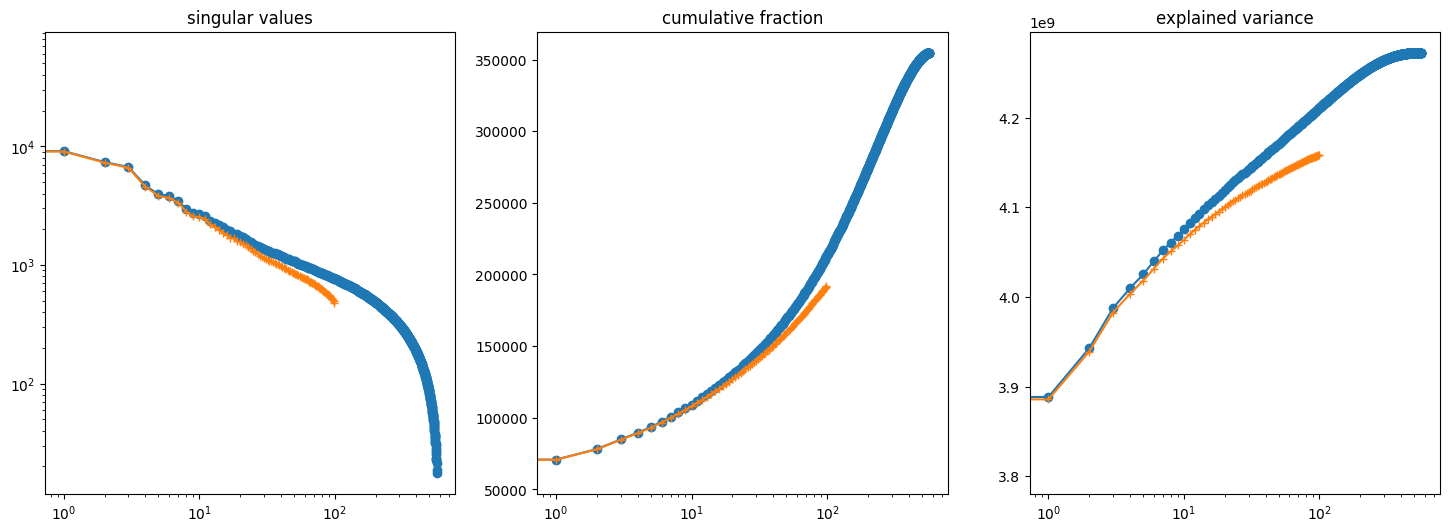

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# SOLUTION-BEGIN
axs[0].loglog(s, "o-")
axs[0].loglog(s_rand, "+-")
axs[0].set_title("singular values")

axs[1].semilogx(np.cumsum(s), "o-")
axs[1].semilogx(np.cumsum(s_rand), "+-")
axs[1].set_title("cumulative fraction")

axs[2].semilogx(np.cumsum(s**2), "o-")
axs[2].semilogx(np.cumsum(s_rand**2), "+-")
axs[2].set_title("explained variance")
# SOLUTION-END

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

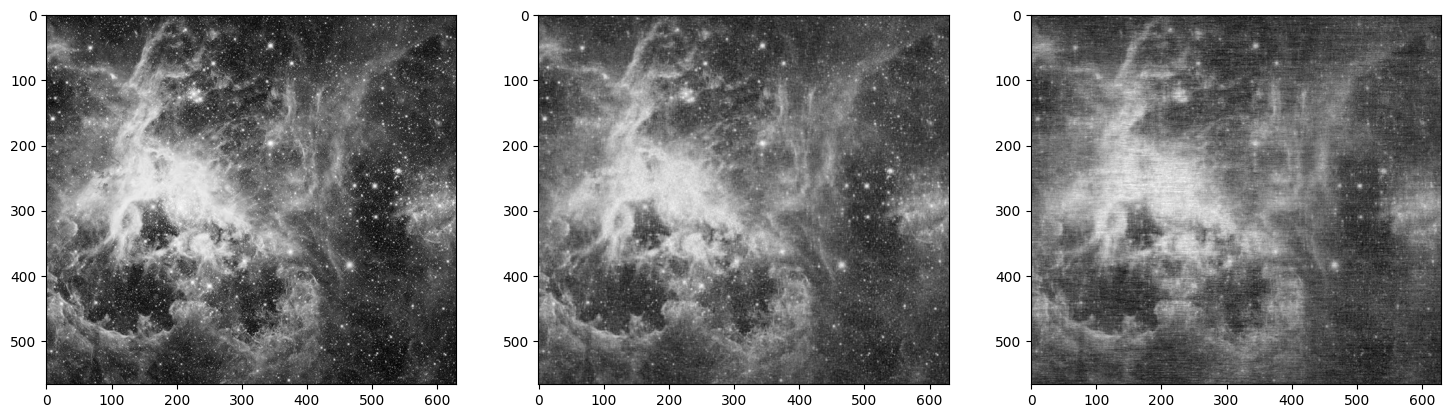

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# SOLUTION-BEGIN
axs[0].imshow(X, cmap="gray")
axs[1].imshow(U[:, :k] @ np.diag(s[:k]) @ VT[:k, :], cmap="gray")
axs[2].imshow(U_rand @ np.diag(s_rand) @ VT_rand, cmap="gray")
# SOLUTION-END